In [5]:
#Example Problem-Decision Tree-Blue or Red

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Reading the file
mydata=pd.read_csv("BlueorRed1.csv")
mydata.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [8]:
Y=mydata["Undecided"]
X=mydata.iloc[:,1:9]
print(Y.head())
print(X.head())

0    1
1    1
2    1
3    0
4    0
Name: Undecided, dtype: int64
   Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  Church
0   51          1       1        1              4   171.0         15       0
1   37          1       1        1              3    96.0         18       0
2   53          1       1        1              6    86.0         20       0
3   33          1       1        1              2   176.0         18       1
4   46          1       1        1              6   420.0         15       1


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
X_train.shape

(7000, 8)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier()
clf_tree=DecisionTreeClassifier(criterion="entropy",max_depth=7)
clf_tree.fit(X_train,Y_train)
tree_predict=clf_tree.predict(X_train)
round(accuracy_score(Y_train,tree_predict),3)
pred_prob=clf_tree.predict_proba(X_train)

[Text(141.557625, 203.85, 'X[6] <= 12.5\nentropy = 0.97\nsamples = 7000\nvalue = [4211, 2789]'),
 Text(59.42700000000001, 176.67000000000002, 'X[0] <= 35.5\nentropy = 0.15\nsamples = 2092\nvalue = [2047, 45]'),
 Text(32.643, 149.49, 'X[5] <= 247.0\nentropy = 0.082\nsamples = 488\nvalue = [483, 5]'),
 Text(21.762, 122.31, 'X[5] <= 67.25\nentropy = 0.056\nsamples = 471\nvalue = [468, 3]'),
 Text(18.414, 95.13, 'X[0] <= 21.5\nentropy = 0.126\nsamples = 173\nvalue = [170, 3]'),
 Text(6.696000000000001, 67.94999999999999, 'X[7] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(3.3480000000000003, 40.77000000000001, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(10.044, 40.77000000000001, 'X[4] <= 4.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(6.696000000000001, 13.590000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(13.392000000000001, 13.590000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(30.132, 67.94999999999999, 'X[5] <= 66.

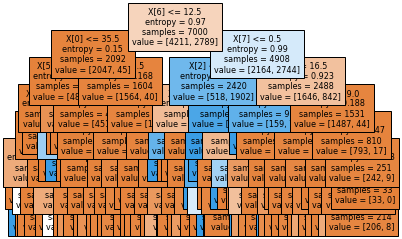

In [11]:
from sklearn import tree
tree.plot_tree(clf_tree,filled=True, fontsize=8)

In [12]:
confusion_matrix(Y_train,tree_predict)

array([[4211,    0],
       [  97, 2692]])

<AxesSubplot:>

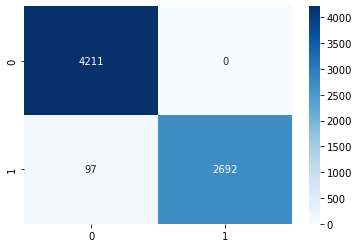

In [13]:
cm=confusion_matrix(Y_train,tree_predict)
sns.heatmap(cm,annot=True,cmap="Blues",fmt=".0f")

In [14]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,tree_predict)
print((Report))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4211
           1       1.00      0.97      0.98      2789

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [15]:
importances=clf_tree.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.010147,0.000689,0.090262,0.001087,0.004643,0.225275,0.547084,0.120812


In [16]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"criterion":["gini","entropy"],
                  "max_depth":range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X,Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [17]:
clf.best_score_

0.9798993513989884

In [18]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [19]:
prediction=tree_predict
Prediction=pd.DataFrame(prediction)
Prediction
Prediction=Prediction.iloc[:,1:9]

In [20]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob
pred_class=(pred_prob[1]>=0.5).astype(np.int)

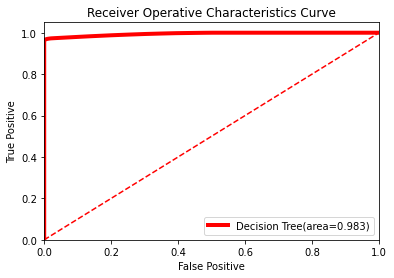

In [21]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_train.head()
pred_class
dt_auc=roc_auc_score(Y_train.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr, label="Decision Tree(area=%0.3f)" % dt_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operative Characteristics Curve")
plt.legend(loc="lower right")
plt.show()